#Connect colab to drive to access dataset

In [1]:
from google.colab import drive
drive.mount("/Drive")

Drive already mounted at /Drive; to attempt to forcibly remount, call drive.mount("/Drive", force_remount=True).


In [2]:
import pandas as pd

#verify data in dataset

In [3]:
df = pd.read_csv('/Drive/My Drive/Colab Notebooks/lab experiment/exam/ilp.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.shape

(583, 11)

Number of records: 583
Number of patients likely to have liver disease 416
Number of patients unlikely to have liver disease 167
Percentage of patients likely to have liver disease 71.35506003430532%


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


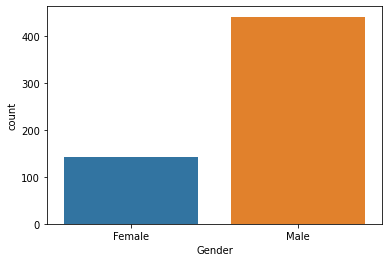

In [6]:
import seaborn as sns

n_records = len(df.index)
n_records_liv_pos = len(df[df['Dataset'] == 1])
n_records_liv_neg = len(df[df['Dataset'] == 2])
percent_liver_disease_pos = (n_records_liv_pos/n_records)*100

print("Number of records: {}".format(n_records))
print("Number of patients likely to have liver disease {}".format(n_records_liv_pos))
print("Number of patients unlikely to have liver disease {}".format(n_records_liv_neg))
print("Percentage of patients likely to have liver disease {}%".format(percent_liver_disease_pos))

sns.countplot(data=df, x = 'Gender', label='Count')


# changing gender  values to 0, 1 ; 0 indicates female and 1 indicate male


In [7]:
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df[:10]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [8]:
# Drop Dataset field
#df = df.drop(['Dataset'], axis=1)
#df.head()

#Remove missing values

In [9]:
df = df.dropna()
df[:10]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fe3157b38>,
      dtype=object)

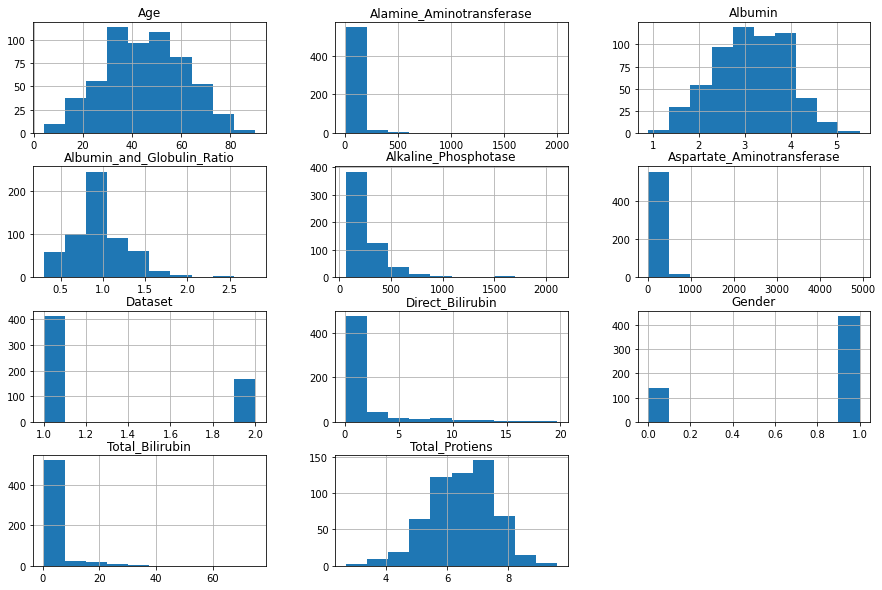

In [10]:
# plot histogram
df.hist(figsize=(15,10))

In [11]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

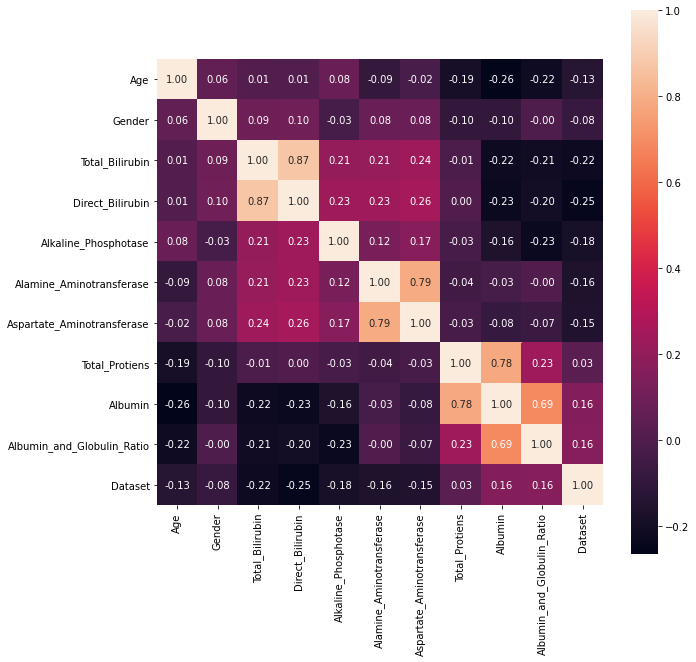

In [13]:
# calculate correlation coefficients for the dataset
correlations = df.corr()

# and visualize
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

In [14]:
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

scaler = MinMaxScaler()
numerical = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
             'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

liver_minmax_transform = pd.DataFrame(data = df)
liver_minmax_transform[numerical] = scaler.fit_transform(df[numerical])

display(liver_minmax_transform.head(n = 5))

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.709302,0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1
1,0.674419,1,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1
2,0.674419,1,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1
3,0.627907,1,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1
4,0.790698,1,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1


In [15]:
import numpy as np

In [16]:
X = np.array(df)[:, 0:10]
X

array([[0.70930233, 0.        , 0.00402145, ..., 0.5942029 , 0.52173913,
        0.24      ],
       [0.6744186 , 1.        , 0.14075067, ..., 0.69565217, 0.5       ,
        0.176     ],
       [0.6744186 , 1.        , 0.0924933 , ..., 0.62318841, 0.52173913,
        0.236     ],
       ...,
       [0.55813953, 1.        , 0.00536193, ..., 0.53623188, 0.5       ,
        0.28      ],
       [0.31395349, 1.        , 0.01206434, ..., 0.5942029 , 0.54347826,
        0.28      ],
       [0.39534884, 1.        , 0.0080429 , ..., 0.66666667, 0.76086957,
        0.48      ]])

In [17]:
y = np.array(df)[:, 10].reshape(X.shape[0],1) - 1
y[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

#Optimization algorithm for binary classification of liver dieseae (1=+/  0=-)

In [18]:
def sigmoid(X, c):
    return 1/(1+np.exp(-X.dot(c)))

In [19]:
def logistic_obj(X,c,y):
    
    # c dx1 vector of weights
    # X nxd matrix of data values
    # y nx1 vector of labels
    
    obj_value = (-1/X.shape[0]) * np.sum(y*np.log(sigmoid(X, c)) + (1 - y)*np.log(1 - sigmoid(X, c)))
    
    return obj_value

In [20]:
def logistic_grad(X,c,y):
    
    return (1/X.shape[0]) * np.dot(X.T, sigmoid(X, c) - y)

In [21]:
def logistic_sgd(X,c,y):
    
    (n,d) = X.shape
    
    idx = np.random.randint(n)
    
    x = X[idx, :].reshape(1, d)
    
    z = np.dot(x.T, sigmoid(x, c) - y)

    return z.T

In [22]:

x0 = np.array([50., 1., 0.5, 5.,400.,25.,8.,7.2,3.2,0.8]).reshape(10,1)
x1 = np.array([54., 1., 0.3, 5.5,200.,23.,7.,7.4,3.1,0.5]).reshape(10,1)

[x0, x1]

[array([[ 50. ],
        [  1. ],
        [  0.5],
        [  5. ],
        [400. ],
        [ 25. ],
        [  8. ],
        [  7.2],
        [  3.2],
        [  0.8]]), array([[ 54. ],
        [  1. ],
        [  0.3],
        [  5.5],
        [200. ],
        [ 23. ],
        [  7. ],
        [  7.4],
        [  3.1],
        [  0.5]])]

[[-1.04532219]
 [-0.41555215]
 [-0.62292214]
 [-1.20909339]
 [-0.86616795]
 [-0.58406425]
 [-0.33115585]
 [-0.40171405]
 [ 0.4226848 ]
 [ 0.43187364]]


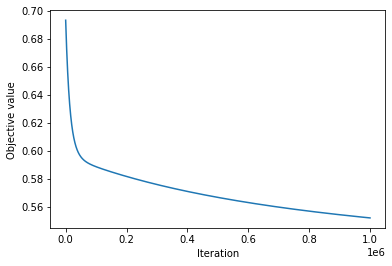

In [23]:
eta = 0.0001

iterations = 1000000

c = np.zeros((10,1))

# We will use the following vector to keep track of objective values
objective_values = np.zeros((iterations,1))

for i in range(iterations):
    
    c = c - eta * logistic_grad(X,c,y)
    
    # store current objective value
    objective_values[i] = logistic_obj(X,c,y)
    
    

# Plot the objective as a function of the iteration
plt.plot(objective_values)
plt.xlabel('Iteration')
plt.ylabel('Objective value')

print(c)

#Confusion matrix is used to  evaluate the accuracy of a classification



In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(sigmoid(X, c) > 0.5, y == 1)

array([[414, 163],
       [  0,   2]])

#Compare Naive Prediction with confusion_matrix prediction


In [25]:
liver_data_labels = df['Dataset']
true_pos = n_records_liv_pos
false_pos = liver_data_labels.count() - true_pos
true_neg = 0
false_neg = 0
print('true positives: {} | true negatives: {}'.format(true_pos,false_pos))

# Calculate accuracy, precision and recall
accuracy = true_pos/liver_data_labels.count()
recall = true_pos/(true_pos + false_neg)
precision = true_pos/(true_pos + false_pos)
print('accuracy: {} | precision: {} | recall: {}'.format(accuracy, precision, recall))

# Calculate F-score using the formula above
beta = 2
#F score, also called the F1 score or F measure, is a measure of a test’s accuracy. 
fscore = (1 + beta * beta) * (precision * recall) / (beta * beta * precision + recall)

# Result 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

true positives: 416 | true negatives: 163
accuracy: 0.7184801381692574 | precision: 0.7184801381692574 | recall: 1.0
Naive Predictor: [Accuracy score: 0.7185, F-score: 0.9273]
